# CREDIT CARD SEGMENTATION

## Problem Statement

### Advanced data preparation: 
Build an ‘enriched’ customer profile by deriving “intelligent” KPIs such as:
    
Monthly average purchase and cash advance amount
    
Purchases by type (one-off, installments)
    
Average amount per purchase and cash advance transaction,
    
Limit usage (balance to credit limit ratio),
    
Payments to minimum payments ratio etc.
    
Advanced reporting: Use the derived KPIs to gain insight on the customer profiles.
    
Identification of the relationships/ affinities between services.

### Clustering   
    
Apply a data reduction technique factor analysis for variable reduction technique and a clustering algorithm  to reveal the behavioural segments of credit card holders
    
Identify cluster characterisitics of the cluster using detailed profiling.
    
Provide the strategic insights and implementation of strategies for given set of cluster characteristics

### Import Library

In [1]:
import os
import sys
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sn
%matplotlib inline
import scipy.stats as stats
from datetime import datetime
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=sys.maxsize)
sns.set(style = 'whitegrid', palette = 'Set2')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
os.getcwd()

'C:\\Users\\ganes\\edws'

***CUST_ID:*** Credit card holder ID

***BALANCE:*** Monthly average balance (based on daily balance averages)

***BALANCE_FREQUENCY:*** Ratio of last 12 months with balance

***PURCHASES:*** Total purchase amount spent during last 12 months

***ONEOFF_PURCHASES:*** Total amount of one-off purchases

***INSTALLMENTS_PURCHASES:*** Total amount of installment purchases

***CASH_ADVANCE:*** Total cash-advance amount

***PURCHASES_ FREQUENCY:*** Frequency of purchases (Percent of months with at least one purchase)

***ONEOFF_PURCHASES_FREQUENCY:*** Frequency of one-off-purchases

***PURCHASES_INSTALLMENTS_FREQUENCY:*** Frequency of installment purchases

***CASH_ADVANCE_ FREQUENCY:*** Cash-Advance frequency

***AVERAGE_PURCHASE_TRX:*** Average amount per purchase transaction

***CASH_ADVANCE_TRX:*** Average amount per cash-advance transaction

***PURCHASES_TRX:*** Average amount per purchase transaction

***CREDIT_LIMIT:*** Credit limit

***PAYMENTS:*** Total payments (due amount paid by the customer to decrease their statement balance) in the period

***MINIMUM_PAYMENTS:*** Total minimum payments due in the period.

***PRC_FULL_PAYMEN:*** Percentage of months with full payment of the due statement balance

***TENURE:*** Number of months as a customer

### Load data

In [3]:
# importing data
credit_data= pd.read_csv("credit-card-data.csv")
credit_data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [4]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# let's see total number of missing values in the dataframe
print ("\nMissing values :  ", credit_data.isnull().sum().values.sum())


Missing values :   314


In [6]:
# let's see total numbers of Unique value in the dataframe. 
print ("\nUnique values :  \n",credit_data.nunique())


Unique values :  
 CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64


In [7]:
credit_data.shape

(8950, 18)

In [8]:
credit_data.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

## Missing Value Treatment
Since there are missing values in the data let's impute them with median.

In [9]:
credit_data.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [10]:
# CREDIT_LIMIT  and MINIMUM_PAYMENTS has missing values,let's remove with median.
credit_data['CREDIT_LIMIT'].fillna(credit_data['CREDIT_LIMIT'].median(),inplace=True)
credit_data['CREDIT_LIMIT'].count()

credit_data['MINIMUM_PAYMENTS'].median()
credit_data['MINIMUM_PAYMENTS'].fillna(credit_data['MINIMUM_PAYMENTS'].median(),inplace=True)

In [11]:
#let's again check the missing values
credit_data.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

## Deriving New Intelligent KPI's

### Monthly average purchase and cash advance amount

#### Monthly_avg_purchase

In [12]:
credit_data['Monthly_avg_purchase']=credit_data['PURCHASES']/credit_data['TENURE']

In [13]:
print(credit_data['Monthly_avg_purchase'].head(),'\n',
     credit_data['TENURE'].head(),'\n', credit_data['PURCHASES'].head())

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_avg_purchase, dtype: float64 
 0    12
1    12
2    12
3    12
4    12
Name: TENURE, dtype: int64 
 0      95.40
1       0.00
2     773.17
3    1499.00
4      16.00
Name: PURCHASES, dtype: float64


#### Monthly_cash_advance Amount

In [14]:
credit_data['Monthly_cash_advance'] = credit_data['CASH_ADVANCE']/credit_data['TENURE']

In [15]:
credit_data[credit_data['ONEOFF_PURCHASES'] == 0]['ONEOFF_PURCHASES'].count()

4302

### Purchases by type(one-off, installments)
Let's find what types of purchases the customers are making on credit card

In [16]:
credit_data.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]

ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES
0                 0.00                   95.40
1                 0.00                    0.00
2               773.17                    0.00
3              1499.00                    0.00
4                16.00                    0.00
...                ...                     ...
8945              0.00                  291.12
8946              0.00                  300.00
8947              0.00                  144.40
8948              0.00                    0.00
8949           1093.25                    0.00

[8950 rows x 2 columns]

#### Find customers ONEOFF_PURCHASES and INSTALLMENTS_PURCHASES details

In [17]:
credit_data[(credit_data['ONEOFF_PURCHASES'] == 0) & (credit_data['INSTALLMENTS_PURCHASES'] == 0)].shape

(2042, 20)

In [18]:
credit_data[(credit_data['ONEOFF_PURCHASES'] > 0) & (credit_data['INSTALLMENTS_PURCHASES'] > 0)].shape

(2774, 20)

In [19]:
credit_data[(credit_data['ONEOFF_PURCHASES'] > 0) & (credit_data['INSTALLMENTS_PURCHASES'] == 0)].shape

(1874, 20)

In [20]:
credit_data[(credit_data['ONEOFF_PURCHASES'] == 0) & (credit_data['INSTALLMENTS_PURCHASES'] > 0)].shape

(2260, 20)

##### As shown above we found there are 4 types of purchase behaviour in the data set. So we need to derive a categorical variable based on their behaviour

In [21]:
def purchase(credit_data):
    if (credit_data['ONEOFF_PURCHASES'] == 0) & (credit_data['INSTALLMENTS_PURCHASES'] == 0):
        return 'none'
    if (credit_data['ONEOFF_PURCHASES'] > 0) & (credit_data['INSTALLMENTS_PURCHASES'] > 0):
         return 'both_oneoff_installment'
    if (credit_data['ONEOFF_PURCHASES'] > 0) & (credit_data['INSTALLMENTS_PURCHASES'] == 0):
        return 'one_off'
    if (credit_data['ONEOFF_PURCHASES'] == 0) & (credit_data['INSTALLMENTS_PURCHASES'] > 0):
        return 'installment'

In [22]:
credit_data['purchase_type']=credit_data.apply(purchase,axis=1)

In [23]:
credit_data['purchase_type'].value_counts()

both_oneoff_installment    2774
installment                2260
none                       2042
one_off                    1874
Name: purchase_type, dtype: int64

#### Limit_usage (balance to credit limit ratio ) credit card utilization
Lower value implies customers are maintaing thier balance properly. Lower value indicates good credit score.

In [24]:
credit_data['limit_usage']=credit_data.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'], axis=1)

In [25]:
credit_data['limit_usage'].head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: limit_usage, dtype: float64

#### Payments to minimum payments ratio

In [26]:
credit_data['PAYMENTS'].isnull().any()
credit_data['MINIMUM_PAYMENTS'].isnull().value_counts()

False    8950
Name: MINIMUM_PAYMENTS, dtype: int64

In [27]:
credit_data['MINIMUM_PAYMENTS'].describe()

count     8950.000000
mean       844.906767
std       2332.792322
min          0.019163
25%        170.857654
50%        312.343947
75%        788.713501
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [28]:
credit_data['payment_minpay']=credit_data.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)

In [29]:
credit_data['payment_minpay']

0       1.446508
1       3.826241
2       0.991682
3       0.000000
4       2.771075
          ...   
8945    6.660231
8946    0.883197
8947    0.986076
8948    0.942505
8949    0.715439
Name: payment_minpay, Length: 8950, dtype: float64

####  Extreme values Treatment
Since there are variables having extreme values so let's do log-transformation on the dataset to remove outlier effect. 

In [30]:
### log transformation
credit_log = credit_data.drop(['CUST_ID','purchase_type'],axis = 1).applymap(lambda x: np.log(x+1))

In [31]:
credit_log.describe()

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count  8950.000000        8950.000000  8950.000000       8950.000000   
mean      6.161637           0.619940     4.899647          3.204274   
std       2.013303           0.148590     2.916872          3.246365   
min       0.000000           0.000000     0.000000          0.000000   
25%       4.861995           0.635989     3.704627          0.000000   
50%       6.773521           0.693147     5.892417          3.663562   
75%       7.628099           0.693147     7.013133          6.360274   
max       9.854515           0.693147    10.800403         10.615512   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean                 3.352403      3.319086             0.361268   
std                  3.082973      3.566298             0.277317   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.080042   
50%                  4.499810      0.000000             0.405465   
75%                  6.151961      7.016449             0.650588   
max                 10.021315     10.760839             0.693147   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.158699                          0.270072   
std                      0.216672                          0.281852   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.080042                          0.154151   
75%                      0.262364                          0.559616   
max                      0.693147                          0.693147   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8950.000000   
mean                 0.113512          0.817570       1.894731      8.094825   
std                  0.156716          1.009316       1.373856      0.819629   
min                  0.000000          0.000000       0.000000      3.931826   
25%                  0.000000          0.000000       0.693147      7.378384   
50%                  0.000000          0.000000       2.079442      8.006701   
75%                  0.200671          1.609438       2.890372      8.779711   
max                  0.916291          4.820282       5.883322     10.308986   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  \
count  8950.000000       8950.000000       8950.000000  8950.000000   
mean      6.624540          5.916079          0.117730     2.519680   
std       1.591763          1.169929          0.211617     0.130367   
min       0.000000          0.018982          0.000000     1.945910   
25%       5.951361          5.146667          0.000000     2.564949   
50%       6.754489          5.747301          0.000000     2.564949   
75%       7.550732          6.671670          0.133531     2.564949   
max      10.834125         11.243832          0.693147     2.564949   

       Monthly_avg_purchase  Monthly_cash_advance  limit_usage  payment_minpay  
count           8950.000000           8950.000000  8950.000000     8950.000000  
mean               3.050877              2.163970     0.296081        1.357600  
std                2.002823              2.429741     0.250303        0.940149  
min                0.000000              0.000000     0.000000        0.000000  
25%                1.481458              0.000000     0.040656        0.648817  
50%                3.494587              0.000000     0.264455        1.109459  
75%                4.587295              4.606022     0.540911        1.953415  
max                8.315721              8.276166     2.827902        8.830767

In [32]:
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
credit_pred=credit_log[[x for x in credit_log.columns if x not in col ]]

In [33]:
credit_pred.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'limit_usage', 'payment_minpay'],
      dtype='object')

In [34]:
credit_log.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Monthly_avg_purchase', 'Monthly_cash_advance', 'limit_usage',
       'payment_minpay'],
      dtype='object')

### Insights from KPI's

#### Average payment_minpayment ratio for each purchase type.

In [35]:
x=credit_data.groupby('purchase_type').apply(lambda x: np.mean(x['payment_minpay']))
type(x)
x.values

array([ 7.23698216, 13.2590037 , 10.08745106,  5.57108156])

Text(0.5, 1.0, 'Mean payment_minpayment ratio for each purchase type')

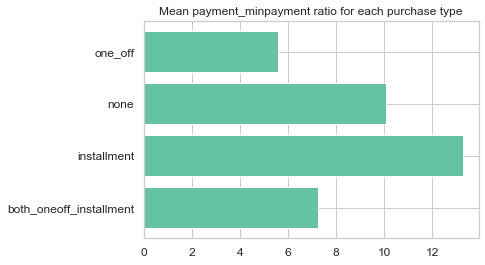

In [36]:
fig,ax=plt.subplots()
ax.barh(y=range(len(x)), width=x.values,align='center')
ax.set(yticks= np.arange(len(x)),yticklabels = x.index);
plt.title('Mean payment_minpayment ratio for each purchase type')

In [37]:
credit_data.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8950.000000   
mean                 0.135144          3.248827      14.709832   4494.282473   
std                  0.200121          6.824647      24.857649   3638.646702   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  \
count   8950.000000       8950.000000       8950.000000  8950.000000   
mean    1733.143852        844.906767          0.153715    11.517318   
std     2895.063757       2332.792322          0.292499     1.338331   
min        0.000000          0.019163          0.000000     6.000000   
25%      383.276166        170.857654          0.000000    12.000000   
50%      856.901546        312.343947          0.000000    12.000000   
75%     1901.134317        788.713501          0.142857    12.000000   
max    50721.483360      76406.207520          1.000000    12.000000   

       Monthly_avg_purchase  Monthly_cash_advance  limit_usage  payment_minpay  
count           8950.000000           8950.000000  8950.000000     8950.000000  
mean              86.175173             88.977984     0.388884        9.059164  
std              180.508787            193.136115     0.389722      118.180526  
min                0.000000              0.000000     0.000000        0.000000  
25%                3.399375              0.000000     0.041494        0.913275  
50%               31.936667              0.000000     0.302720        2.032717  
75%               97.228333             99.085196     0.717571        6.052729  
max             4086.630833           3928.100980    15.909951     6840.52

#### Customers with installments purchases are paying their dues.

In [38]:
credit_data[credit_data['purchase_type'] == 'n']

Empty DataFrame
Columns: [CUST_ID, BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE, Monthly_avg_purchase, Monthly_cash_advance, purchase_type, limit_usage, payment_minpay]
Index: []

Text(0.5, 1.0, 'Average cash advance taken by the customers of different Purchase type : Both, None,Installment,One_Off')

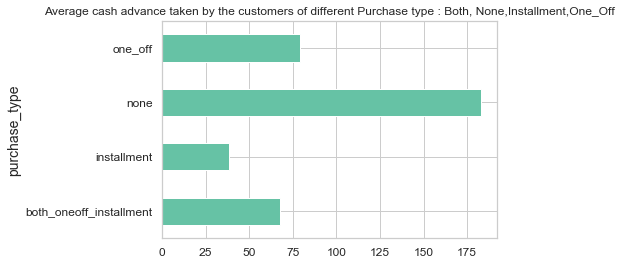

In [39]:
credit_data.groupby('purchase_type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).plot.barh()

plt.title('Average cash advance taken by the customers of different Purchase type : Both, None,Installment,One_Off')

#### Customers who don't do either one-off or installments purchases take more cash on advance.

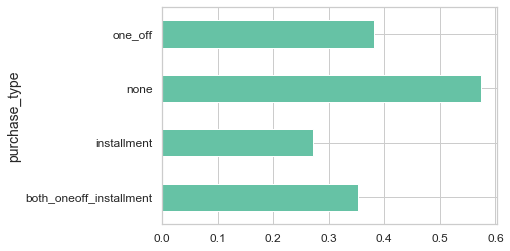

In [40]:
credit_data.groupby('purchase_type').apply(lambda x: np.mean(x['limit_usage'])).plot.barh()

#### Original dataset with categorical column converted into numeric type.

In [41]:
credit_original=pd.concat([credit_data,pd.get_dummies(credit_data['purchase_type'])],axis=1)

### Make Machine Learning Algorithm

We have some categorical data which should be converted with the help of dummy variables creation

In [42]:
# creating dummies for categorical variable
credit_pred['purchase_type']=credit_data.loc[:,'purchase_type']
pd.get_dummies(credit_pred['purchase_type'])

both_oneoff_installment  installment  none  one_off
0                           0            1     0        0
1                           0            0     1        0
2                           0            0     0        1
3                           0            0     0        1
4                           0            0     0        1
...                       ...          ...   ...      ...
8945                        0            1     0        0
8946                        0            1     0        0
8947                        0            1     0        0
8948                        0            0     1        0
8949                        0            0     0        1

[8950 rows x 4 columns]

##### Now merge the created dummy variables with the original dataframe

In [43]:
credit_dummy=pd.concat([credit_pred,pd.get_dummies(credit_pred['purchase_type'])],axis=1)

In [44]:
l=['purchase_type']

In [45]:
credit_dummy = credit_dummy.drop(l,axis=1)
credit_dummy.isnull().any()

BALANCE_FREQUENCY                   False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
Monthly_avg_purchase                False
Monthly_cash_advance                False
limit_usage                         False
payment_minpay                      False
both_oneoff_installment             False
installment                         False
none                                False
one_off                             False
dtype: bool

In [46]:
credit_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE_FREQUENCY                 8950 non-null   float64
 1   ONEOFF_PURCHASES                  8950 non-null   float64
 2   INSTALLMENTS_PURCHASES            8950 non-null   float64
 3   PURCHASES_FREQUENCY               8950 non-null   float64
 4   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 5   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 6   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 7   CASH_ADVANCE_TRX                  8950 non-null   float64
 8   PURCHASES_TRX                     8950 non-null   float64
 9   Monthly_avg_purchase              8950 non-null   float64
 10  Monthly_cash_advance              8950 non-null   float64
 11  limit_usage                       8950 non-null   float64
 12  paymen

In [47]:
credit_dummy.head()

BALANCE_FREQUENCY  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0           0.597837          0.000000                4.568506   
1           0.646627          0.000000                0.000000   
2           0.693147          6.651791                0.000000   
3           0.492477          7.313220                0.000000   
4           0.693147          2.833213                0.000000   

   PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0             0.154151                    0.000000   
1             0.000000                    0.000000   
2             0.693147                    0.693147   
3             0.080042                    0.080042   
4             0.080042                    0.080042   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  \
0                          0.080042                0.000000          0.000000   
1                          0.000000                0.223144          1.609438   
2                          0.000000                0.000000          0.000000   
3                          0.000000                0.080042          0.693147   
4                          0.000000                0.000000          0.000000   

   PURCHASES_TRX  Monthly_avg_purchase  Monthly_cash_advance  limit_usage  \
0       1.098612              2.191654              0.000000     0.040086   
1       0.000000              0.000000              6.287695     0.376719   
2       2.564949              4.180994              0.000000     0.287197   
3       0.693147              4.835620              2.898616     0.200671   
4       0.693147              0.847298              0.000000     0.519644   

   payment_minpay  both_oneoff_installment  installment  none  one_off  
0        0.894662                        0            1     0        0  
1        1.574068                        0            0     1        0  
2        0.688979                        0            0     0        1  
3        0.000000                        0            0     0        1  
4        1.327360                        0            0     0        1

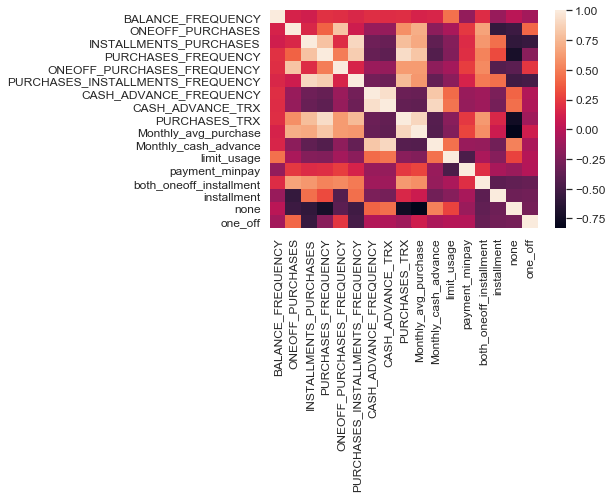

In [48]:
sns.heatmap(credit_dummy.corr())


##### Heat map shows that how features are co-related so that applying dimensionality reduction will help negating multi-colinearity in data



- Before applying PCA let's standardize the data to avoid effect of scale on our result. Centering and Scaling will make all features with equal weight.

### Standardrizing the data 
To put data on the same scale 

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
sc = StandardScaler()

In [51]:
credit_dummy.shape

(8950, 17)

In [52]:
credit_scaled = sc.fit_transform(credit_dummy)

In [53]:
credit_scaled

array([[-1.48757463e-01, -9.87089577e-01,  3.94479839e-01,
        -7.46901374e-01, -7.32479989e-01, -6.74253396e-01,
        -7.24360360e-01, -8.10068733e-01, -5.79509528e-01,
        -4.29030049e-01, -8.90667374e-01, -1.02279589e+00,
        -4.92436696e-01, -6.70192533e-01,  1.72051649e+00,
        -5.43690450e-01, -5.14625001e-01],
       [ 1.79615684e-01, -9.87089577e-01, -1.08745376e+00,
        -1.30279873e+00, -7.32479989e-01, -9.58256475e-01,
         6.99592207e-01,  7.84602546e-01, -1.37921008e+00,
        -1.52337342e+00,  1.69728173e+00,  3.22181718e-01,
         2.30261450e-01, -6.70192533e-01, -5.81220817e-01,
         1.83928189e+00, -5.14625001e-01],
       [ 4.92710032e-01,  1.06202168e+00, -1.08745376e+00,
         1.19682027e+00,  2.46676194e+00, -9.58256475e-01,
        -7.24360360e-01, -8.10068733e-01,  4.87864812e-01,
         5.64293529e-01, -8.90667374e-01, -3.54953302e-02,
        -7.11225478e-01, -6.70192533e-01, -5.81220817e-01,
        -5.43690450e-01,  1.9

## Applying Principal Component Analysis(PCA)

##### With the help of principal component analysis we will do feature reduction

In [54]:
from sklearn.decomposition import PCA

In [55]:
credit_dummy.shape

(8950, 17)

In [56]:
### As we have 17 features so our n_components will be 17
pc = PCA(n_components = 17)
credit_pca = pc.fit(credit_scaled)

In [57]:
## let's check the variance for 17 components
### ideal variance shoild be 1 which is 100%
round(sum(credit_pca.explained_variance_ratio_))

1.0

In [58]:
var_ratio={}
for n in range(2,18):
    pc=PCA(n_components=n)
    credit_pca=pc.fit(credit_scaled)
    var_ratio[n]=sum(credit_pca.explained_variance_ratio_)

In [59]:
var_ratio

{2: 0.5826439793960281,
 3: 0.7299379309512697,
 4: 0.8115442762351256,
 5: 0.877055579529143,
 6: 0.9186492443512622,
 7: 0.9410925256030127,
 8: 0.9616114053683058,
 9: 0.9739787081990641,
 10: 0.9835896584630708,
 11: 0.9897248107341949,
 12: 0.9927550009135221,
 13: 0.9953907562385422,
 14: 0.9979616898169593,
 15: 0.9996360473172954,
 16: 0.9999999999999999,
 17: 0.9999999999999999}

##### Let's select  6 components which are giving about 90% variance

In [60]:
pc = PCA(n_components = 6)

In [61]:
p = pc.fit(credit_scaled)

In [62]:
credit_scaled.shape

(8950, 17)

In [63]:
p.explained_variance_

array([6.83574755, 3.07030693, 2.50427698, 1.38746289, 1.1138166 ,
       0.70717132])

In [64]:
np.sum(p.explained_variance_)

15.618782269308808

In [65]:
var_ratio

{2: 0.5826439793960281,
 3: 0.7299379309512697,
 4: 0.8115442762351256,
 5: 0.877055579529143,
 6: 0.9186492443512622,
 7: 0.9410925256030127,
 8: 0.9616114053683058,
 9: 0.9739787081990641,
 10: 0.9835896584630708,
 11: 0.9897248107341949,
 12: 0.9927550009135221,
 13: 0.9953907562385422,
 14: 0.9979616898169593,
 15: 0.9996360473172954,
 16: 0.9999999999999999,
 17: 0.9999999999999999}

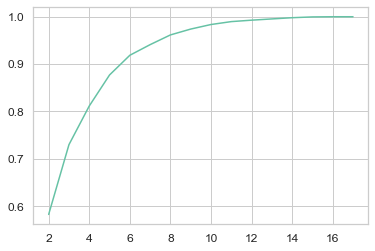

In [66]:
pd.Series(var_ratio).plot()

##### Let's select 5 components which are giving 87% variance

In [67]:
credit_scaled.shape

(8950, 17)

In [68]:
pc_final=PCA(n_components=6).fit(credit_scaled)

reduced_credit=pc_final.fit_transform(credit_scaled)

In [69]:
dt = pd.DataFrame(reduced_credit)

In [70]:
dt.head()

0         1         2         3         4         5
0 -0.242841 -2.759668  0.343061 -0.417359 -0.007100  0.019755
1 -3.975652  0.144625 -0.542989  1.023832 -0.428929 -0.572463
2  1.287396  1.508938  2.709966 -1.892252  0.010809 -0.599932
3 -1.047613  0.673103  2.501794 -1.306784  0.761348  1.408986
4 -1.451586 -0.176336  2.286074 -1.624896 -0.561969 -0.675214

##### 17 variables now got reduced to 5 after reduction

In [71]:
dt.shape

(8950, 6)

In [72]:
col_list = credit_dummy.columns

In [73]:
col_list

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'limit_usage', 'payment_minpay',
       'both_oneoff_installment', 'installment', 'none', 'one_off'],
      dtype='object')

In [74]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(6)],index=col_list)

PC_0      PC_1      PC_2      PC_3  \
BALANCE_FREQUENCY                 0.029707  0.240072 -0.263140 -0.353549   
ONEOFF_PURCHASES                  0.214107  0.406078  0.239165  0.001520   
INSTALLMENTS_PURCHASES            0.312051 -0.098404 -0.315625  0.087983   
PURCHASES_FREQUENCY               0.345823  0.015813 -0.162843 -0.074617   
ONEOFF_PURCHASES_FREQUENCY        0.214702  0.362208  0.163222  0.036303   
PURCHASES_INSTALLMENTS_FREQUENCY  0.295451 -0.112002 -0.330029  0.023502   
CASH_ADVANCE_FREQUENCY           -0.214336  0.286074 -0.278586  0.096353   
CASH_ADVANCE_TRX                 -0.229393  0.291556 -0.285089  0.103484   
PURCHASES_TRX                     0.355503  0.106625 -0.102743 -0.054296   
Monthly_avg_purchase              0.345992  0.141635  0.023986 -0.079373   
Monthly_cash_advance             -0.243861  0.264318 -0.257427  0.135292   
limit_usage                      -0.146302  0.235710 -0.251278 -0.431682   
payment_minpay                    0.119632  0.021328  0.136357  0.591561   
both_oneoff_installment           0.241392  0.273676 -0.131935  0.254710   
installment                       0.082209 -0.443375 -0.208683 -0.190829   
none                             -0.310283 -0.005214 -0.096911  0.245104   
one_off                          -0.042138  0.167737  0.472749 -0.338549   

                                      PC_4      PC_5  
BALANCE_FREQUENCY                -0.228681 -0.693816  
ONEOFF_PURCHASES                 -0.023197  0.129094  
INSTALLMENTS_PURCHASES           -0.002181  0.115223  
PURCHASES_FREQUENCY               0.115948 -0.081879  
ONEOFF_PURCHASES_FREQUENCY       -0.051279 -0.097299  
PURCHASES_INSTALLMENTS_FREQUENCY  0.025871  0.006731  
CASH_ADVANCE_FREQUENCY            0.360132  0.066589  
CASH_ADVANCE_TRX                  0.332753  0.082307  
PURCHASES_TRX                     0.104971 -0.009402  
Monthly_avg_purchase              0.194147  0.015878  
Monthly_cash_advance              0.268026  0.058258  
limit_usage                      -0.181885  0.024298  
payment_minpay                    0.215446 -0.572467  
both_oneoff_installment          -0.340849  0.294708  
installment                       0.353821 -0.086087  
none                             -0.342222 -0.176809  
one_off                           0.362585 -0.060698

##### The above data gave us eigen vector for each component, we had all eigen vector value very small we can remove those variable but in our case we don't.

In [75]:
# Factor Analysis : variance explained by each component- 
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(6)])

PC_0    0.402058
PC_1    0.180586
PC_2    0.147294
PC_3    0.081606
PC_4    0.065511
PC_5    0.041594
dtype: float64

# Clustering

Based on the type of purchases made by customers and their distinctive behavior exhibited based on the purchase_type (as we visualized in above Insights from KPI) , let's start with 4 clusters.

In [76]:
from sklearn.cluster import KMeans

In [77]:
kme_4 = KMeans(n_clusters = 4, random_state = 123)

In [79]:
kme_4.fit(reduced_credit)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [80]:
kme_4.labels_

array([0, 1, 3, 3, 3, 0, 2, 0, 2, 3, 0, 3, 2, 2, 1, 0, 1, 0, 2, 0, 0, 2,
       0, 2, 1, 0, 3, 0, 2, 0, 2, 2, 3, 3, 0, 1, 1, 2, 3, 3, 1, 2, 3, 1,
       2, 2, 0, 1, 2, 3, 2, 2, 1, 3, 0, 3, 3, 2, 1, 0, 3, 3, 1, 3, 0, 2,
       1, 1, 2, 3, 0, 2, 1, 2, 2, 2, 3, 0, 1, 3, 2, 1, 2, 0, 2, 3, 2, 2,
       3, 1, 2, 2, 3, 3, 3, 1, 3, 1, 0, 1, 3, 0, 2, 0, 1, 3, 0, 1, 2, 2,
       2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 3, 0, 1, 1, 3, 1, 2, 3, 1, 3, 2,
       0, 3, 0, 2, 2, 2, 2, 3, 2, 1, 1, 2, 2, 3, 0, 3, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 1, 2, 3, 1, 1, 2, 2, 0, 1, 0, 2, 0, 2, 1, 2, 0, 1, 2, 1,
       3, 1, 2, 0, 2, 0, 1, 3, 2, 0, 0, 2, 3, 3, 3, 3, 3, 0, 3, 2, 2, 2,
       3, 1, 3, 2, 0, 2, 2, 0, 3, 2, 2, 2, 2, 2, 1, 3, 0, 0, 2, 2, 2, 2,
       2, 2, 3, 2, 3, 3, 2, 2, 1, 2, 2, 0, 3, 3, 2, 3, 0, 2, 0, 2, 3, 2,
       2, 3, 2, 0, 2, 0, 0, 2, 3, 0, 0, 3, 1, 0, 3, 2, 0, 1, 3, 2, 2, 2,
       2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 3, 3, 3, 0, 2, 2, 0, 2, 2, 1, 1,
       1, 2, 3, 1, 2, 2, 3, 1, 0, 2, 3, 1, 3, 3, 3,

In [82]:
pd.Series(kme_4.labels_).value_counts()

2    2769
0    2224
1    2088
3    1869
dtype: int64

##### We don't know k vakue here, so let's find k value by taking cluster range between 1 and 21

## Identifying cluster error

In [83]:
cluster_range = range( 1, 21 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(reduced_credit)
    cluster_errors.append(clusters.inertia_)
# clusters.inertia_ is basically a cluster error here.

In [85]:
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df[0:21]

num_clusters  cluster_errors
0              1   139772.482528
1              2    93307.589087
2              3    70744.915197
3              4    49446.066485
4              5    42548.525149
5              6    37712.989946
6              7    34124.595039
7              8    31285.586804
8              9    28867.731715
9             10    26302.941708
10            11    24020.962947
11            12    22364.710273
12            13    21006.623066
13            14    19857.283646
14            15    19115.596626
15            16    18044.115630
16            17    17396.341308
17            18    16896.539689
18            19    16336.447524
19            20    15761.910197

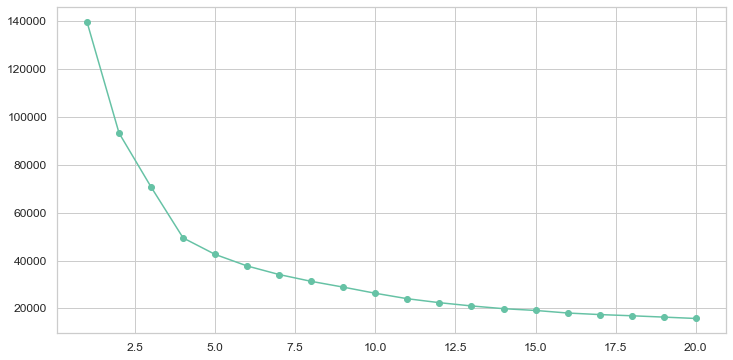

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

##### From the above graph the elbow range is 4,5,6

# Silhouette Coefficient

In [87]:
from sklearn import metrics

In [90]:
# calculate Silhouette coefficient for K=3 through K=12
k_range = range(2, 21)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(reduced_credit)
    scores.append(metrics.silhouette_score(reduced_credit, km.labels_))

In [91]:
scores

[0.3312680667306926,
 0.35434954252843254,
 0.4370857743965951,
 0.431237237185239,
 0.42288676393994196,
 0.3937963135186254,
 0.41809162539140154,
 0.38917300772433827,
 0.3931386449748959,
 0.3678804540227034,
 0.3670035207564237,
 0.3513315057884269,
 0.35261478354017806,
 0.32954227834412875,
 0.3339471644625439,
 0.33818909037815487,
 0.3354282536390573,
 0.33040923050706344,
 0.3215328121767455]

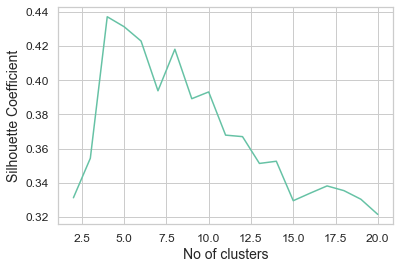

In [92]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('No of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

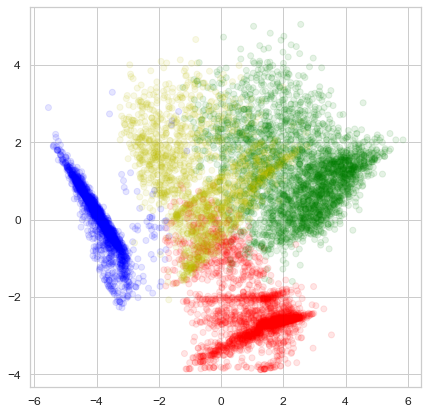

In [93]:
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in kme_4.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_credit[:,0],reduced_credit[:,1],c=label_color,cmap='Spectral',alpha=0.1)

##### We will use pairplots which will provide us all graph in one time.

In [94]:
df_pair_plot=pd.DataFrame(reduced_credit,columns=['PC_' +str(i) for i in range(6)])

In [95]:
#Add cluster column in the data frame
df_pair_plot['Cluster']=kme_4.labels_

In [96]:
df_pair_plot.head()

PC_0      PC_1      PC_2      PC_3      PC_4      PC_5  Cluster
0 -0.242841 -2.759668  0.343061 -0.417359 -0.007100  0.019755        0
1 -3.975652  0.144625 -0.542989  1.023832 -0.428929 -0.572463        1
2  1.287396  1.508938  2.709966 -1.892252  0.010809 -0.599932        3
3 -1.047613  0.673103  2.501794 -1.306784  0.761348  1.408986        3
4 -1.451586 -0.176336  2.286074 -1.624896 -0.561969 -0.675214        3

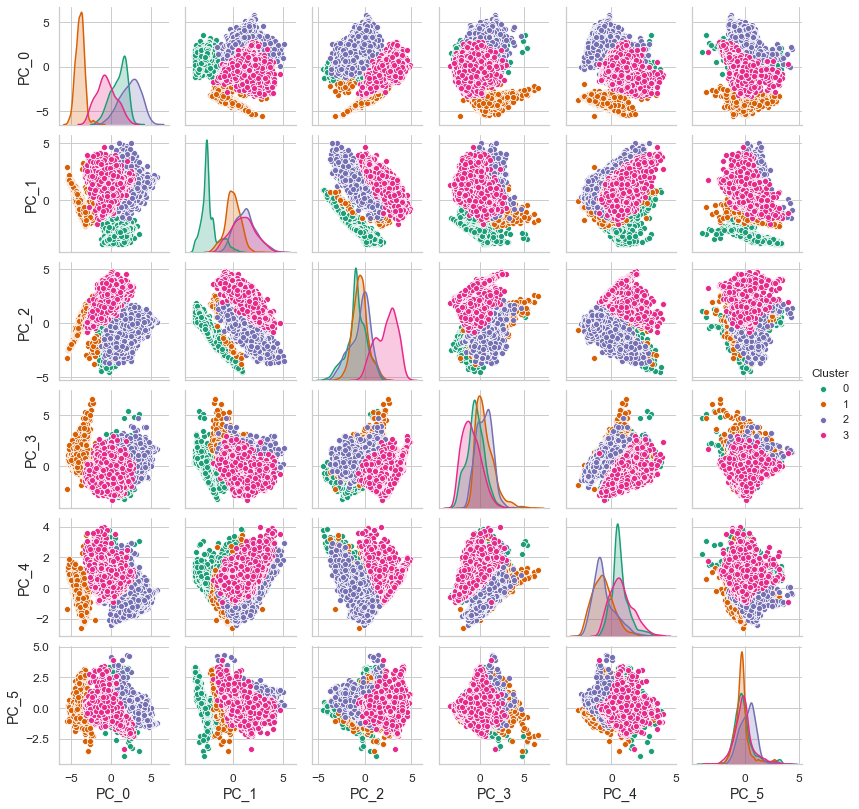

In [99]:
#pairwise relationship of components on the data
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

##### Above first 2 components identify clusters

##### We are done with PCA. Now let's merge our original dataframe with cluster

In [104]:
# Key performace variable selection . Let's take the varibales which are used in derving new KPI. 
#We can take all 17 variables but it will be difficult to interprate.So let's select less no of variables.

col_kpi=['PURCHASES_TRX','Monthly_avg_purchase','Monthly_cash_advance','limit_usage','CASH_ADVANCE_TRX',
         'payment_minpay','both_oneoff_installment','installment','one_off','none','CREDIT_LIMIT']

In [105]:
credit_pred.describe()

BALANCE_FREQUENCY  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
count        8950.000000       8950.000000             8950.000000   
mean            0.619940          3.204274                3.352403   
std             0.148590          3.246365                3.082973   
min             0.000000          0.000000                0.000000   
25%             0.635989          0.000000                0.000000   
50%             0.693147          3.663562                4.499810   
75%             0.693147          6.360274                6.151961   
max             0.693147         10.615512               10.021315   

       PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count          8950.000000                 8950.000000   
mean              0.361268                    0.158699   
std               0.277317                    0.216672   
min               0.000000                    0.000000   
25%               0.080042                    0.000000   
50%               0.405465                    0.080042   
75%               0.650588                    0.262364   
max               0.693147                    0.693147   

       PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
count                       8950.000000             8950.000000   
mean                           0.270072                0.113512   
std                            0.281852                0.156716   
min                            0.000000                0.000000   
25%                            0.000000                0.000000   
50%                            0.154151                0.000000   
75%                            0.559616                0.200671   
max                            0.693147                0.916291   

       CASH_ADVANCE_TRX  PURCHASES_TRX  Monthly_avg_purchase  \
count       8950.000000    8950.000000           8950.000000   
mean           0.817570       1.894731              3.050877   
std            1.009316       1.373856              2.002823   
min            0.000000       0.000000              0.000000   
25%            0.000000       0.693147              1.481458   
50%            0.000000       2.079442              3.494587   
75%            1.609438       2.890372              4.587295   
max            4.820282       5.883322              8.315721   

       Monthly_cash_advance  limit_usage  payment_minpay  
count           8950.000000  8950.000000     8950.000000  
mean               2.163970     0.296081        1.357600  
std                2.429741     0.250303        0.940149  
min                0.000000     0.000000        0.000000  
25%                0.000000     0.040656        0.648817  
50%                0.000000     0.264455        1.109459  
75%                4.606022     0.540911        1.953415  
max                8.276166     2.827902        8.830767

In [106]:
# Concatenating labels found through Kmeans with data 
cluster_df_4=pd.concat([credit_original[col_kpi],pd.Series(kme_4.labels_,name='Cluster_4')],axis=1)

In [107]:
cluster_df_4.head()

PURCHASES_TRX  Monthly_avg_purchase  Monthly_cash_advance  limit_usage  \
0              2              7.950000              0.000000     0.040901   
1              0              0.000000            536.912124     0.457495   
2             12             64.430833              0.000000     0.332687   
3              1            124.916667             17.149001     0.222223   
4              1              1.333333              0.000000     0.681429   

   CASH_ADVANCE_TRX  payment_minpay  both_oneoff_installment  installment  \
0                 0        1.446508                        0            1   
1                 4        3.826241                        0            0   
2                 0        0.991682                        0            0   
3                 1        0.000000                        0            0   
4                 0        2.771075                        0            0   

   one_off  none  CREDIT_LIMIT  Cluster_4  
0        0     0        1000.0          0  
1        0     1        7000.0          1  
2        1     0        7500.0          3  
3        1     0        7500.0          3  
4        1     0        1200.0          3

In [108]:
# Mean value gives a good indication of the distribution of data. So let's mean value for each variable of each cluster
cluster_4=cluster_df_4.groupby('Cluster_4')\
.apply(lambda x: x[col_kpi].mean()).T
cluster_4

Cluster_4                          0            1            2            3
PURCHASES_TRX              12.062050     0.043582    33.013723     7.127341
Monthly_avg_purchase       47.626256     0.148297   193.008043    69.875917
Monthly_cash_advance       33.550080   186.281319    67.466910    78.098613
limit_usage                 0.264745     0.576076     0.353591     0.379761
CASH_ADVANCE_TRX            1.021133     6.540230     2.804261     2.881220
payment_minpay             13.422420     9.936617     7.245651     5.573672
both_oneoff_installment     0.000000     0.001916     1.000000     0.000535
installment                 1.000000     0.017241     0.000000     0.000000
one_off                     0.000000     0.002874     0.000000     0.999465
none                        0.000000     0.977969     0.000000     0.000000
CREDIT_LIMIT             3338.270406  4055.156450  5736.732730  4519.708481

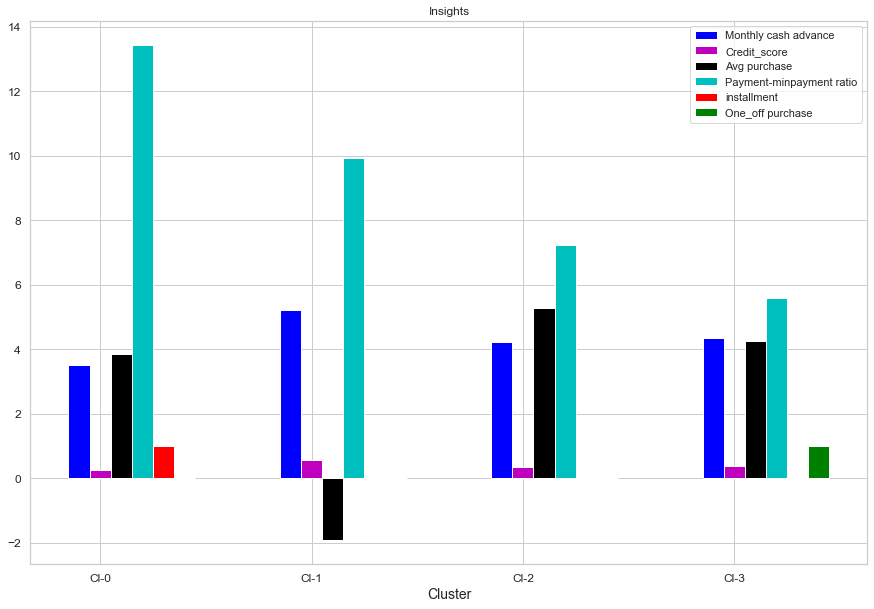

In [109]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['Monthly_cash_advance',:].values)
credit_score=(cluster_4.loc['limit_usage',:].values)
purchase= np.log(cluster_4.loc['Monthly_avg_purchase',:].values)
payment=cluster_4.loc['payment_minpay',:].values
installment=cluster_4.loc['installment',:].values
one_off=cluster_4.loc['one_off',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()

# Insights from above

#### Clusters are clearly distinguishing behavior within the customers



- Cluster 0 is the group of customers who have highest Monthly_avg purchases and doing both installment as well as one_off purchases, have comparatively good credit score. *** This group is about 31% of the total customer base ***
 

- cluster 1 is taking maximum advance_cash and is paying comparatively less minimum payment and poor credit_score & doing no purchase transaction. *** This group is about 23% of the total customer base ***


- Cluster 3 customers are doing maximum One_Off transactions and least payment ratio. *** This group is about 21% of the total customer base ***


- Cluster 2 customers have maximum credit score and  are paying dues and are doing maximum installment purchases. *** This group is about 25% of the total customer base ***

In [110]:
### Percentage of each cluster in the total customer base
s=cluster_df_4.groupby('Cluster_4').apply(lambda x: x['Cluster_4'].value_counts())
print (s),'\n'

per=pd.Series((s.values.astype('float')/ cluster_df_4.shape[0])*100,name='Percentage')
print ("Cluster -4 "),'\n'
print (pd.concat([pd.Series(s.values,name='Size'),per],axis=1))

Cluster_4   
0          0    2224
1          1    2088
2          2    2769
3          3    1869
Name: Cluster_4, dtype: int64
Cluster -4 
   Size  Percentage
0  2224   24.849162
1  2088   23.329609
2  2769   30.938547
3  1869   20.882682


##### finding behavior with 5 clusters

In [111]:
kme_5=KMeans(n_clusters=5,random_state=123)
kme_5=kme_5.fit(reduced_credit)
kme_5.labels_

array([3, 0, 1, 1, 1, 3, 2, 3, 2, 1, 3, 1, 2, 2, 0, 3, 0, 3, 2, 3, 3, 4,
       3, 4, 0, 3, 1, 3, 4, 3, 4, 2, 1, 1, 3, 0, 0, 4, 1, 1, 0, 4, 1, 0,
       2, 4, 3, 0, 2, 1, 4, 2, 0, 1, 3, 1, 1, 2, 0, 3, 1, 1, 0, 1, 3, 2,
       0, 0, 2, 1, 3, 4, 0, 2, 2, 2, 1, 3, 0, 1, 2, 0, 2, 3, 2, 1, 4, 4,
       1, 0, 4, 4, 1, 1, 1, 0, 1, 0, 3, 0, 1, 3, 2, 3, 0, 1, 3, 0, 4, 4,
       2, 0, 4, 0, 2, 2, 3, 0, 3, 0, 4, 1, 3, 0, 0, 1, 0, 2, 1, 0, 1, 2,
       3, 1, 3, 2, 2, 4, 2, 1, 2, 0, 0, 2, 2, 1, 3, 1, 2, 2, 3, 2, 3, 4,
       2, 3, 4, 0, 2, 1, 0, 0, 2, 2, 3, 0, 3, 2, 3, 2, 0, 4, 3, 0, 4, 0,
       1, 0, 2, 3, 2, 3, 4, 1, 2, 3, 3, 2, 1, 1, 1, 1, 1, 3, 1, 2, 2, 2,
       1, 0, 1, 4, 3, 4, 2, 3, 1, 4, 4, 2, 4, 2, 0, 1, 3, 3, 4, 2, 4, 2,
       2, 2, 1, 2, 1, 1, 2, 2, 0, 2, 2, 3, 1, 1, 2, 1, 3, 2, 3, 2, 1, 2,
       2, 1, 2, 3, 2, 3, 4, 2, 1, 3, 3, 1, 0, 3, 1, 4, 3, 0, 1, 2, 2, 4,
       2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 4, 1, 1, 1, 3, 2, 2, 3, 2, 2, 0, 0,
       0, 4, 1, 0, 2, 4, 1, 0, 3, 2, 1, 0, 1, 1, 1,

In [112]:
pd.Series(kme_5.labels_).value_counts()

3    2149
0    2081
2    1977
1    1862
4     881
dtype: int64

Text(0, 0.5, 'PC_1')

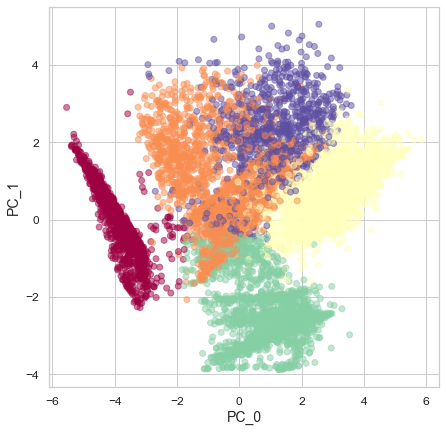

In [114]:
plt.figure(figsize = (7,7))
plt.scatter(reduced_credit[:,0],reduced_credit[:,1],c = kme_5.labels_,cmap = 'Spectral', alpha = 0.5)
plt.xlabel('PC_0')
plt.ylabel('PC_1')

In [115]:
cluster_df_5=pd.concat([credit_original[col_kpi],pd.Series(kme_5.labels_,name='Cluster_5')],axis=1)

In [116]:
#### Finding Mean of features for each cluster
cluster_df_5.groupby('Cluster_5')\
.apply(lambda x: x[col_kpi].mean()).T

Cluster_5                          0            1            2            3  \
PURCHASES_TRX               0.032196     7.096670    34.587759    11.905537   
Monthly_avg_purchase        0.086126    68.917645   210.536468    47.369817   
Monthly_cash_advance      185.038534    74.517541     4.040708    20.636870   
limit_usage                 0.576110     0.377959     0.258931     0.250011   
CASH_ADVANCE_TRX            6.448823     2.697637     0.152757     0.550489   
payment_minpay              9.963172     5.562287     8.675499    13.783426   
both_oneoff_installment     0.000000     0.002148     1.000000     0.000000   
installment                 0.015858     0.000000     0.000000     1.000000   
one_off                     0.002883     0.997852     0.000000     0.000000   
none                        0.981259     0.000000     0.000000     0.000000   
CREDIT_LIMIT             4046.692295  4497.951209  5722.970627  3228.949923   

Cluster_5                          4  
PURCHASES_TRX              27.703746  
Monthly_avg_purchase      141.584086  
Monthly_cash_advance      249.942101  
limit_usage                 0.600096  
CASH_ADVANCE_TRX           10.384790  
payment_minpay              3.651686  
both_oneoff_installment     0.900114  
installment                 0.088536  
one_off                     0.011351  
none                        0.000000  
CREDIT_LIMIT             5873.041998

### Conclusion With 5 clusters : 

- we have a group of customers (cluster 0) having highest avergae purchases but there is Cluster 4 also having highest cash advance & secong highest purchase behaviour but their type of purchases are same.

- Cluster 0 and Cluster 4 are behaving similar in terms of Credit_limit and have cash transactions is on higher side




So we don't have to quite distinguishable characteristics with 5 clusters

In [117]:
s1=cluster_df_5.groupby('Cluster_5').apply(lambda x: x['Cluster_5'].value_counts())
print (s1)

Cluster_5   
0          0    2081
1          1    1862
2          2    1977
3          3    2149
4          4     881
Name: Cluster_5, dtype: int64


In [119]:
### Percentage of each cluster
print("Cluster-5"),'\n'
perc_5=pd.Series((s1.values.astype('float')/cluster_df_5.shape[0])*100,name='Percentage')
print(pd.concat([pd.Series(s1.values,name='Size'),perc_5],axis=1))

Cluster-5
   Size  Percentage
0  2081   23.251397
1  1862   20.804469
2  1977   22.089385
3  2149   24.011173
4   881    9.843575


## Finding behavior with 6 clusters

In [120]:
kme_6 = KMeans(n_clusters = 6).fit(reduced_credit)
kme_6.labels_

array([3, 1, 2, 2, 2, 3, 0, 3, 0, 2, 3, 2, 0, 0, 1, 3, 1, 3, 0, 3, 3, 4,
       3, 4, 1, 3, 5, 3, 4, 3, 4, 0, 5, 2, 3, 1, 1, 4, 5, 5, 1, 4, 2, 1,
       0, 4, 3, 1, 0, 5, 4, 0, 1, 2, 3, 2, 5, 0, 1, 3, 2, 2, 1, 2, 3, 0,
       1, 1, 0, 2, 3, 4, 1, 0, 0, 0, 2, 3, 1, 5, 0, 1, 0, 3, 0, 2, 4, 4,
       5, 1, 4, 4, 5, 2, 2, 1, 2, 1, 3, 1, 2, 3, 0, 3, 1, 5, 3, 1, 4, 4,
       0, 1, 4, 1, 0, 0, 3, 1, 3, 1, 4, 2, 3, 1, 1, 2, 1, 0, 5, 1, 2, 0,
       3, 5, 3, 0, 0, 4, 0, 5, 0, 1, 1, 0, 0, 2, 3, 2, 0, 0, 3, 0, 3, 4,
       0, 3, 4, 1, 0, 5, 1, 1, 0, 0, 3, 1, 3, 0, 3, 0, 1, 4, 3, 1, 4, 1,
       5, 1, 0, 3, 0, 3, 4, 2, 0, 3, 3, 0, 5, 5, 2, 2, 2, 3, 2, 0, 0, 0,
       2, 1, 2, 4, 3, 4, 0, 3, 5, 4, 4, 0, 4, 0, 1, 2, 3, 3, 4, 0, 4, 0,
       0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0, 3, 2, 2, 0, 2, 3, 0, 3, 0, 5, 0,
       0, 2, 0, 3, 0, 3, 4, 0, 5, 3, 3, 2, 1, 3, 2, 4, 3, 1, 2, 0, 0, 4,
       0, 0, 0, 2, 2, 0, 0, 5, 0, 0, 4, 2, 5, 2, 3, 0, 0, 3, 0, 0, 1, 1,
       1, 4, 2, 1, 0, 4, 2, 1, 3, 0, 5, 1, 2, 2, 5,

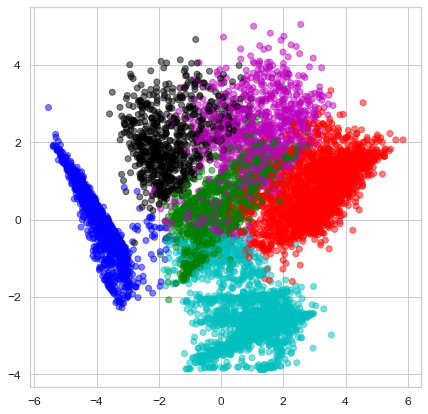

In [121]:
color_map={0:'r',1:'b',2:'g',3:'c',4:'m',5:'k'}
label_color=[color_map[l] for l in kme_6.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_credit[:,0],reduced_credit[:,1],c=label_color,cmap='Spectral',alpha=0.5)

In [122]:
cluster_df_6 = pd.concat([credit_original[col_kpi],pd.Series(kme_6.labels_,name='Cluster_6')],axis=1)

In [123]:
six_clusters=cluster_df_6.groupby('Cluster_6').apply(lambda x: x[col_kpi].mean()).T
six_clusters

Cluster_6                          0            1            2            3  \
PURCHASES_TRX              34.663789     0.030347     7.760575    11.905537   
Monthly_avg_purchase      211.196582     0.088891    78.585295    47.369817   
Monthly_cash_advance        4.027720   184.829434     3.603272    20.636870   
limit_usage                 0.258206     0.575724     0.245772     0.250011   
CASH_ADVANCE_TRX            0.150838     6.434971     0.125212     0.550489   
payment_minpay              8.702974     9.976487     6.911822    13.783426   
both_oneoff_installment     1.000000     0.000000     0.006768     0.000000   
installment                 0.000000     0.016378     0.000000     1.000000   
one_off                     0.000000     0.000000     0.993232     0.000000   
none                        0.000000     0.983622     0.000000     0.000000   
CREDIT_LIMIT             5735.293514  4047.527296  4471.701020  3228.949923   

Cluster_6                          4            5  
PURCHASES_TRX              27.919908     5.967143  
Monthly_avg_purchase      140.374727    54.091602  
Monthly_cash_advance      242.856971   205.502536  
limit_usage                 0.600654     0.605930  
CASH_ADVANCE_TRX           10.000000     7.642857  
payment_minpay              3.616973     3.257979  
both_oneoff_installment     0.911899     0.000000  
installment                 0.088101     0.000000  
one_off                     0.000000     1.000000  
none                        0.000000     0.000000  
CREDIT_LIMIT             5834.610984  4577.649351

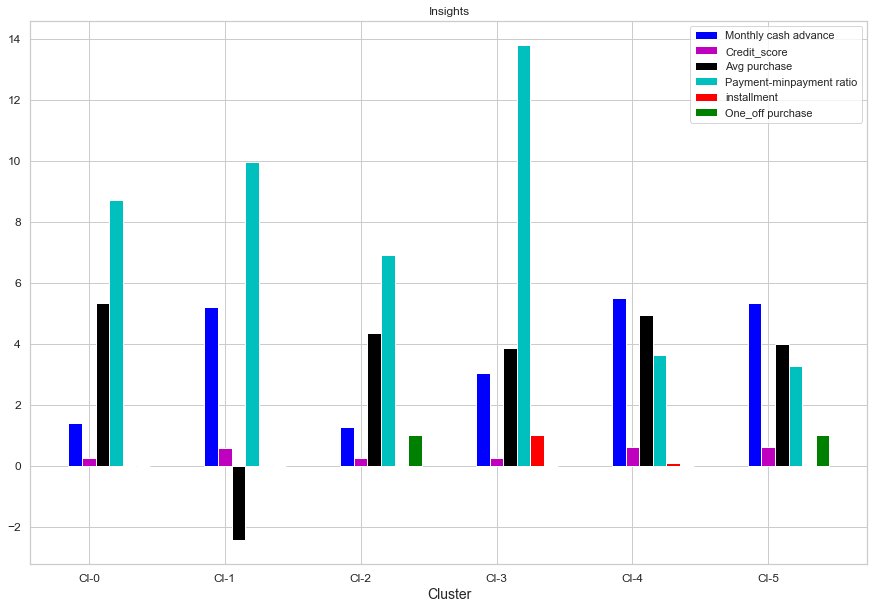

In [124]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(six_clusters.columns))

cash_advance = np.log(six_clusters.loc['Monthly_cash_advance',:].values)
credit_score = (six_clusters.loc['limit_usage',:].values)
purchase = np.log(six_clusters.loc['Monthly_avg_purchase',:].values)
payment = six_clusters.loc['payment_minpay',:].values
installment = six_clusters.loc['installment',:].values
one_off = six_clusters.loc['one_off',:].values

bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4','Cl-5'))
plt.legend()

In [125]:
cash_advance=np.log(six_clusters.loc['Monthly_cash_advance',:].values)
credit_score=list(six_clusters.loc['limit_usage',:].values)
cash_advance

array([1.39320045, 5.21943342, 1.28184245, 3.02707927, 5.49247267,
       5.32545837])

### Conclusion with the 6 

Here also groups are overlapping.

Cl-1 and Cl-2 behaving same.

### Check the performance metrics for K-means

Lets validate performance with two metrics Calinski harabaz and Silhouette score

In [126]:
from sklearn.metrics import calinski_harabaz_score,silhouette_score

In [127]:
score={}
score_c={}
for n in range(3,10):
    km_score=KMeans(n_clusters=n)
    km_score.fit(reduced_credit)
    score_c[n]=calinski_harabaz_score(reduced_credit,km_score.labels_)
    score[n]=silhouette_score(reduced_credit,km_score.labels_)

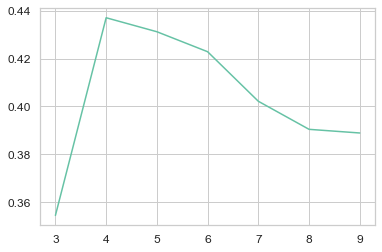

In [128]:
pd.Series(score).plot()

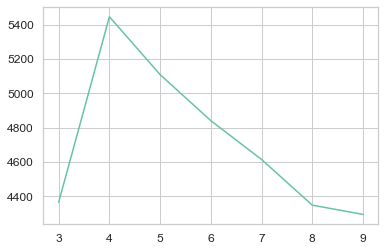

In [129]:
pd.Series(score_c).plot()

##### The performance metrics also says that K-means with 4 clusters is able to show distinguished characteristics of each of the clusters.

#### Insights with 4 clusters

- Cluster 0 is the group of customers who have highest Monthly_avg purchases and doing both installment as well as one_off purchases, have comparatively good credit score. *** This group is about 31% of the total customer base ***
 

- cluster 1 is taking maximum advance_cash and is paying comparatively less minimum payment and poor credit_score & doing no purchase transaction. *** This group is about 23% of the total customer base ***


- Cluster 3 customers are doing maximum One_Off transactions and least payment ratio. *** This group is about 21% of the total customer base ***


- Cluster 2 customers have maximum credit score and  are paying dues and are doing maximum installment purchases. *** This group is about 25% of the total customer base ***

## Suggested Target Marketing Strategy:

#### 1. Group 0(cluster-0)
   - They are potentially targetted customers who are paying their dues and making purchases and maintaining comparatively very good credit score.They can be offered:
   
       -- by increasing credit limit or by lowering down interest rate.
       
       -- by giving Premium card / loyality cards to increase their transactions.
       
       
#### 2. Group 1(cluster-1)
   - This group of customers have poor credit score and taking cash on advance only, so we can target them by providing less interest rates on purchase transactions.
   
   
#### 3. Group 3(cluster-3)
   - This group of customers have minimum paying ratio and using card for just one-off the transactions may be some home bills. They seems to be a risky group.
   
   
#### 4.Group 2(cluster-2)
   - This group of customers are performing best among all as they are maintaining good credit score and paying dues on time.
   
       -- We can give them reward points which will make them for more purchases.